In [1]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./../churn_data.csv")

X = df.drop('churn', axis=1)
y = df['churn']

# Balancing data
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

X_train.replace({'yes': 1, 'no': 0}, inplace=True)
X_test.replace({'yes': 1, 'no': 0}, inplace=True)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


Accuracy: 0.959254947613504

Confusion Matrix:
 [[782  62]
 [  8 866]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       844
           1       0.93      0.99      0.96       874

    accuracy                           0.96      1718
   macro avg       0.96      0.96      0.96      1718
weighted avg       0.96      0.96      0.96      1718



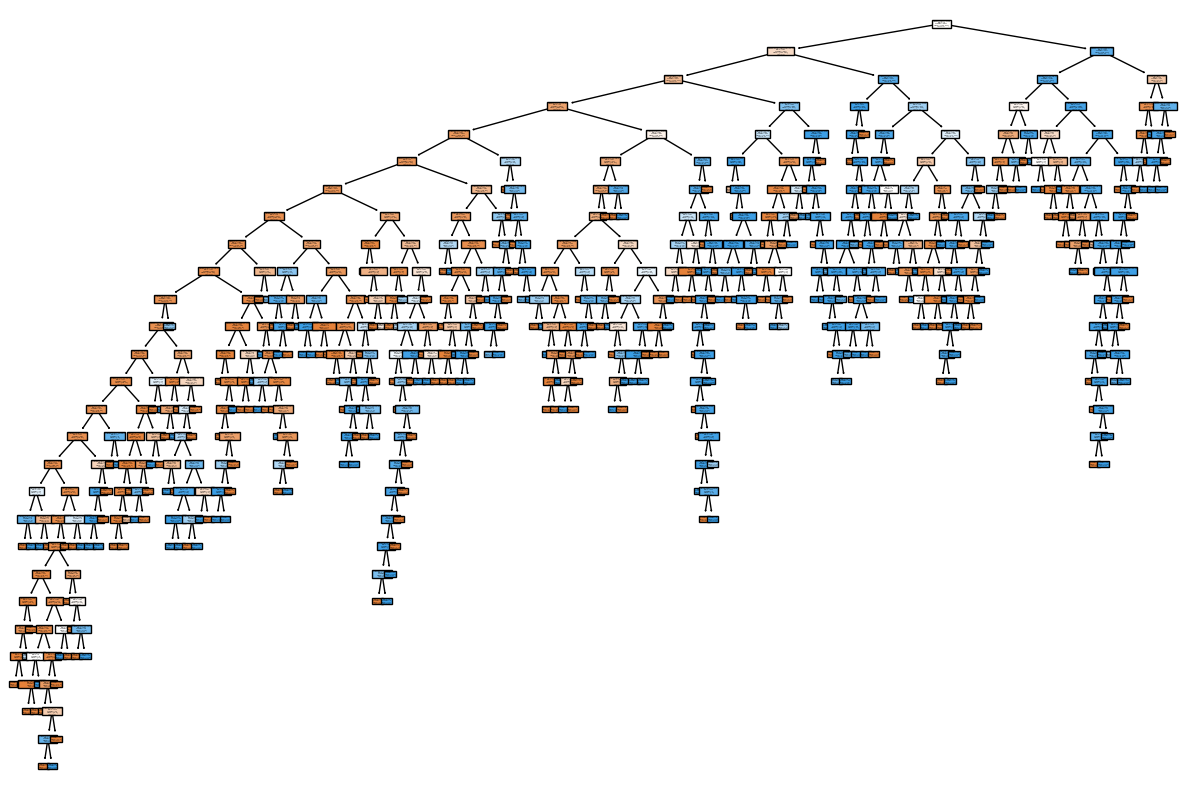

In [5]:
# DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42) #, criterion='gini', max_depth=20, min_samples_leaf=1, min_samples_split=2)
dt_model.fit(X_train, y_train_encoded)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))

# Visualization
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=df['churn'].unique())
plt.show()

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


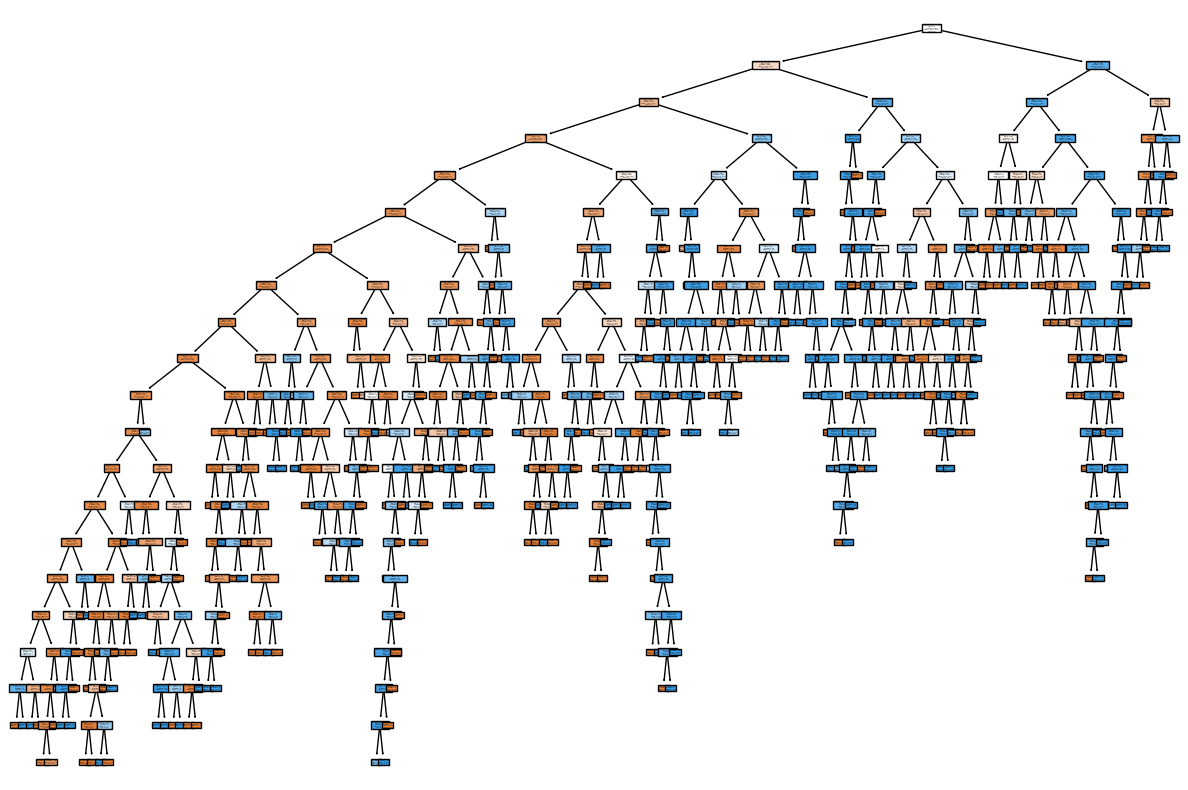

In [4]:
# Hyperparameters tuning

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 12, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train_encoded)#y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_dt_model = grid_search.best_estimator_

# Visualization
plt.figure(figsize=(15, 10))
tree.plot_tree(best_dt_model, filled=True, feature_names=X.columns, class_names=df['churn'].unique())
plt.show()